In [9]:
setwd("~/Projects/livemanager")
load("plm.RData")

In [12]:
odds <- read.csv("data/match_odds.csv")
next_odds <- read.csv("data/next_match_odds.csv")
str(odds)

'data.frame':	216 obs. of  18 variables:
 $ LEAGUE   : Factor w/ 1 level "Bundesliga": 1 1 1 1 1 1 1 1 1 1 ...
 $ FTR      : Factor w/ 3 levels "A","D","H": 3 1 1 1 3 3 3 1 2 2 ...
 $ FTSC     : Factor w/ 28 levels "0:0","0:1","0:2",..: 21 10 8 3 12 13 19 5 7 1 ...
 $ MATCH_URL: Factor w/ 216 levels "http://www.oddsportal.com/soccer/germany/bundesliga/augsburg-b-monchengladbach-GncNw7cb/",..: 23 37 47 52 113 121 172 108 141 81 ...
 $ SEASON   : int  2015 2015 2015 2015 2015 2015 2015 2015 2015 2015 ...
 $ HOMETEAM : Factor w/ 18 levels "1. FC Koln","Augsburg",..: 3 4 5 6 11 12 15 10 13 8 ...
 $ TIME     : Factor w/ 10 levels "13:30","14:30",..: 9 9 9 9 9 9 9 9 9 8 ...
 $ FTHG     : int  4 1 1 0 2 2 3 0 1 0 ...
 $ AVOD     : num  3.84 4.39 8.68 4.11 3.46 3.54 3.57 3.61 3.04 3.44 ...
 $ AWAYTEAM : Factor w/ 18 levels "1. FC Koln","Augsburg",..: 16 17 14 7 8 2 9 18 1 15 ...
 $ AVOA     : num  3.19 5.73 20.6 1.55 4.08 3.17 4.4 1.91 3.05 2.66 ...
 $ COUNTRY  : Factor w/ 1 level "Germany": 1

In [13]:
next_odds

,ODDS_TYPE,MATCH_URL,COUNTRY,TIME,AVOD,AWAYTEAM,AVOA,DATE,AVOH,PAGE_URL,LEAGUE,TIMESTAMP,HOMETEAM,SEASON
1,EU Odds,['Augsburg - Bayer Leverkusen'],Germany,14:30,3.31,Bayer Leverkusen,2.51,05-03-2016,2.9,http://www.oddsportal.com/soccer/germany/bundesliga/,Bundesliga,1457188200,Augsburg,2015
2,EU Odds,['Eintracht Frankfurt - Ingolstadt'],Germany,14:30,3.18,Ingolstadt,2.94,05-03-2016,2.57,http://www.oddsportal.com/soccer/germany/bundesliga/,Bundesliga,1457188200,Eintracht Frankfurt,2015
3,EU Odds,['1. FC Koln - Schalke'],Germany,14:30,3.31,Schalke,2.95,05-03-2016,2.5,http://www.oddsportal.com/soccer/germany/bundesliga/,Bundesliga,1457188200,1. FC Koln,2015
4,EU Odds,['VfB Stuttgart - Hoffenheim'],Germany,14:30,3.87,Hoffenheim,3.86,05-03-2016,1.9,http://www.oddsportal.com/soccer/germany/bundesliga/,Bundesliga,1457188200,VfB Stuttgart,2015
5,EU Odds,['Werder Bremen - Hannover'],Germany,14:30,3.9,Hannover,4.68,05-03-2016,1.74,http://www.oddsportal.com/soccer/germany/bundesliga/,Bundesliga,1457188200,Werder Bremen,2015
6,EU Odds,['Wolfsburg - B. Monchengladbach'],Germany,14:30,3.71,B. Monchengladbach,3.6,05-03-2016,2.02,http://www.oddsportal.com/soccer/germany/bundesliga/,Bundesliga,1457188200,Wolfsburg,2015
7,EU Odds,['Dortmund - Bayern Munich'],Germany,17:30,3.49,Bayern Munich,2.27,05-03-2016,3.19,http://www.oddsportal.com/soccer/germany/bundesliga/,Bundesliga,1457199000,Dortmund,2015
8,EU Odds,['Mainz - Darmstadt'],Germany,14:30,3.61,Darmstadt,4.92,06-03-2016,1.78,http://www.oddsportal.com/soccer/germany/bundesliga/,Bundesliga,1457274600,Mainz,2015
9,EU Odds,['Hamburger SV - Hertha Berlin'],Germany,16:30,3.17,Hertha Berlin,2.62,06-03-2016,2.89,http://www.oddsportal.com/soccer/germany/bundesliga/,Bundesliga,1457281800,Hamburger SV,2015
10,EU Odds,['Hertha Berlin - Schalke'],Germany,19:30,3.23,Schalke,3.11,11-03-2016,2.37,http://www.oddsportal.com/soccer/germany/bundesliga/,Bundesliga,1457724600,Hertha Berlin,2015


In [3]:
temp <- head(odds)
temp

,LEAGUE,FTR,FTSC,MATCH_URL,SEASON,HOMETEAM,TIME,FTHG,AVOD,AWAYTEAM,AVOA,COUNTRY,DATE,ODDS_TYPE,FTAG,AVOH,TIMESTAMP,PAGE_URL
1,Bundesliga,H,2:0,http://www.oddsportal.com/soccer/germany/bundesliga/bayern-munich-hoffenheim-M9RH5MoF/,2015,Bayern Munich,16:30,2,11.42,Hoffenheim,25.51,Germany,31-01-2016,EU Odds,0,1.09,1454257800,http://www.oddsportal.com/soccer/germany/bundesliga/results/#/page/2/
2,Bundesliga,D,1:1,http://www.oddsportal.com/soccer/germany/bundesliga/wolfsburg-koln-WrHiaKOr/,2015,Wolfsburg,14:30,1,4.12,Koln,5.57,Germany,31-01-2016,EU Odds,1,1.61,1454250600,http://www.oddsportal.com/soccer/germany/bundesliga/results/#/page/2/
3,Bundesliga,H,2:1,http://www.oddsportal.com/soccer/germany/bundesliga/vfb-stuttgart-hamburger-E76dbvvk/,2015,VfB Stuttgart,17:30,2,3.74,Hamburger SV,4.1,Germany,30-01-2016,EU Odds,1,1.88,1454175000,http://www.oddsportal.com/soccer/germany/bundesliga/results/#/page/2/
4,Bundesliga,D,0:0,http://www.oddsportal.com/soccer/germany/bundesliga/augsburg-eintracht-frankfurt-hb50cbge/,2015,Augsburg,14:30,0,3.61,Eintracht Frankfurt,3.85,Germany,30-01-2016,EU Odds,0,1.97,1454164200,http://www.oddsportal.com/soccer/germany/bundesliga/results/#/page/2/
5,Bundesliga,H,3:0,http://www.oddsportal.com/soccer/germany/bundesliga/bayer-leverkusen-hannover-fNPP30GR/,2015,Bayer Leverkusen,14:30,3,6.08,Hannover,10.65,Germany,30-01-2016,EU Odds,0,1.28,1454164200,http://www.oddsportal.com/soccer/germany/bundesliga/results/#/page/2/
6,Bundesliga,A,0:2,http://www.oddsportal.com/soccer/germany/bundesliga/darmstadt-schalke-2TniKL08/,2015,Darmstadt,14:30,0,3.38,Schalke,2.31,Germany,30-01-2016,EU Odds,2,3.17,1454164200,http://www.oddsportal.com/soccer/germany/bundesliga/results/#/page/2/


In [14]:
## Express Odds as Chances
next_odds$Hprob <- (1 / next_odds$AVOH) / ((1/next_odds$AVOH) + (1/next_odds$AVOD) + (1/next_odds$AVOA))
next_odds$Aprob <- (1 / next_odds$AVOA) / ((1/next_odds$AVOH) + (1/next_odds$AVOD) + (1/next_odds$AVOA))
odds$Hprob <- (1 / odds$AVOH) / ((1/odds$AVOH) + (1/odds$AVOD) + (1/odds$AVOA))
odds$Aprob <- (1 / odds$AVOA) / ((1/odds$AVOH) + (1/odds$AVOD) + (1/odds$AVOA))


In [5]:
## Align Teamnames with PLM format
levels(next_odds$HOMETEAM) <- c("FCA", "BMG", "B04", "FCB", "D98", "BVB", "SGE", "HSV", "H96", 
                           "BSC", "TSG", "FCI", "KOE", "M05", "S04", "VFB", "SVW", "VFL")
levels(next_odds$AWAYTEAM) <- c("FCA", "BMG", "B04", "FCB", "D98", "BVB", "SGE", "HSV", "H96", 
                           "BSC", "TSG", "FCI", "KOE", "M05", "S04", "VFB", "SVW", "VFL")
levels(odds$HOMETEAM) <- c("FCA", "BMG", "B04", "FCB", "D98", "BVB", "SGE", "HSV", "H96", 
                           "BSC", "TSG", "FCI", "KOE", "M05", "S04", "VFB", "SVW", "VFL")
levels(odds$AWAYTEAM) <- c("FCA", "BMG", "B04", "FCB", "D98", "BVB", "SGE", "HSV", "H96", 
                           "BSC", "TSG", "FCI", "KOE", "M05", "S04", "VFB", "SVW", "VFL")

## Add matchday column
matchdays <- nrow(odds) / 9
odds$matchday = rep(matchdays:1, each = 9)

In [6]:
## Get average earnings per team / match
library("dplyr")
plm.clubmatches <- plm %>%
    filter(!is.na(Club) & game_play_duration > 0) %>%
    group_by(matchday, Club) %>%
    summarise(home = ceiling(mean(Club == home_shortname)),
              earnings = mean(total_earnings)) %>%
    ungroup() %>%
    arrange(matchday, Club)

#head(plm.matches, 20)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [7]:
#odds['matchday']

probs.home <- odds[c('matchday', 'HOMETEAM', 'Hprob')]
probs.away <- odds[c('matchday', 'AWAYTEAM', 'Aprob')]
names <- c("matchday", "Club", "Prob")
colnames(probs.home) <- names
colnames(probs.away) <- names
probs <- rbind(probs.home, probs.away)
head(probs)

,matchday,Club,Prob
1,19,FCB,0.8785996
2,19,VFL,0.5953
3,19,VFB,0.5098892
4,19,FCA,0.4860516
5,19,B04,0.7514762
6,19,D98,0.3020998


In [8]:
earnings_probs <- merge(plm.clubmatches, probs, by = c("matchday", "Club"))
subset(earnings_probs, earnings_probs$matchday == 19)

,matchday,Club,home,earnings,Prob
161,19,B04,1,155714.3,0.7514762
162,19,BMG,0,40272.73,0.3321818
163,19,BSC,0,78461.54,0.3312067
164,19,BVB,1,144625,0.7541284
165,19,D98,1,7192.308,0.3020998
166,19,FCA,1,75142.86,0.4860516
167,19,FCB,1,138071.4,0.8785996
168,19,FCI,0,10076.92,0.07828746
169,19,H96,0,-2888.889,0.09031827
170,19,HSV,0,32846.15,0.2338029


geom_smooth: method="auto" and size of largest group is <1000, so using loess. Use 'method = x' to change the smoothing method.


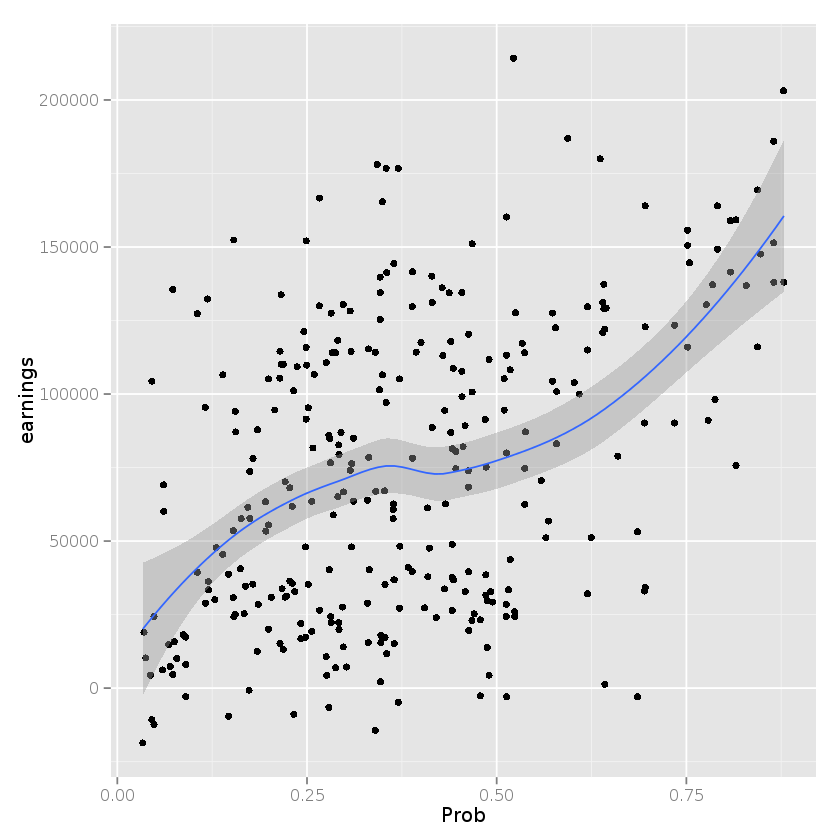

In [9]:
library("ggplot2")
ggplot(data = earnings_probs, aes(x = Prob, y = earnings)) +
geom_point() +
geom_smooth()

In [34]:
## Add prob at individual player level
plm.merge <- merge(plm, earnings_probs, by = c("matchday", "Club"), all.x = TRUE)

geom_smooth: method="auto" and size of largest group is >=1000, so using gam with formula: y ~ s(x, bs = "cs"). Use 'method = x' to change the smoothing method.
Warning message:
: Removed 897 rows containing missing values (stat_smooth).Warning message:
: Removed 897 rows containing missing values (geom_point).

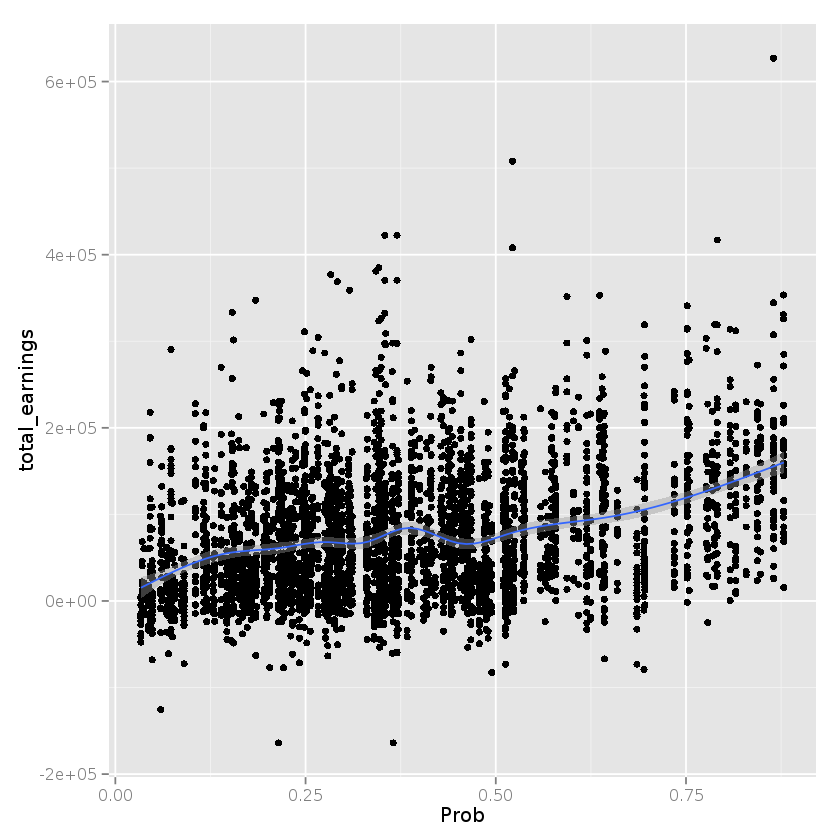

In [28]:
ggplot(data = subset(plm.merge, plm.merge$time_on_pitch > 0), aes(x=Prob, y = total_earnings)) +
geom_point() +
geom_smooth()

## Regression model to predict earnings

In [37]:
load("starter_probs.RData")
plm.merge <- merge(plm.merge, starter_probs, by = c("id", "matchday") )

In [56]:
colnames(plm.merge)[ncol(plm.merge)] <- c("probStarter")
subset(plm.merge, plm.merge$id == 64467)

,id,matchday,Club,assist,clean_sheet,goal,game_play_duration,total_earnings,away_shortname,away_squad,away_score,time_on_pitch,status,match_id,period,finished,home_shortname,home_squad,home_score,in_for_player,sub_in_timestamp,sub_in_minutes,sub_out_minutes,sub_out_timestamp,shot_on_target,attempt_saved,successful_pass,Name,init_Value,Pos,home,earnings,Prob,0,probStarter
1,64467,10,KOE,NA,0,NA,90,35000,KOE,1562,0,90,starter,8851,FullTime,True,FCB,1569,4,NA,1445693400,0,NA,NA,NA,9,25,T. Horn,8.5,GOA,0,-12428.57,0.04833935,0.03896104,0.961039
2,64467,11,KOE,NA,1,NA,90,128500,TSG,1577,0,90,starter,8838,FullTime,True,KOE,1562,0,NA,1446301800,0,NA,NA,NA,4,35,T. Horn,8.5,GOA,1,86923.08,0.4395866,0.002997003,0.997003
3,64467,12,KOE,NA,0,NA,90,82500,KOE,1562,2,90,starter,8866,FullTime,True,B04,1564,1,NA,1446906600,0,NA,NA,NA,3,23,T. Horn,8.5,GOA,0,94153.85,0.1554146,0.002997003,0.997003
4,64467,13,KOE,NA,1,NA,90,116500,M05,1563,0,90,starter,8856,FullTime,True,KOE,1562,0,NA,1448116200,0,NA,NA,NA,1,26,T. Horn,8.5,GOA,1,80500,0.4462202,0,1
5,64467,14,KOE,NA,1,NA,90,126000,KOE,1562,0,90,starter,8889,FullTime,True,D98,1575,0,NA,1448652600,0,NA,NA,NA,1,23,T. Horn,8.5,GOA,0,78142.86,0.3889625,0,1
6,64467,15,KOE,NA,0,NA,90,57000,FCA,1568,1,90,starter,8874,FullTime,True,KOE,1562,0,NA,1449325800,0,NA,NA,NA,7,31,T. Horn,8.5,GOA,1,23964.29,0.4202156,0.002997003,0.997003
7,64467,16,KOE,NA,0,NA,90,131000,KOE,1562,1,90,starter,8907,FullTime,True,BRE,1576,1,NA,1449930600,0,NA,NA,NA,5,23,T. Horn,8.5,GOA,0,67076.92,0.3523604,0.001998002,0.998002
8,64467,17,KOE,NA,0,NA,90,66000,BVB,1565,1,90,starter,8892,FullTime,True,KOE,1562,2,NA,1450535400,0,NA,NA,NA,2,15,T. Horn,8.5,GOA,1,87115.38,0.1561722,0.006993007,0.993007
9,64467,18,KOE,NA,0,NA,90,28500,VFB,1578,3,90,starter,8919,FullTime,True,KOE,1562,1,NA,1453559400,0,NA,NA,NA,5,29,T. Horn,8.5,GOA,1,32769.23,0.4584779,0.000999001,0.999001
10,64467,19,KOE,NA,0,NA,90,49000,KOE,1562,1,90,starter,8918,FullTime,True,WOB,1579,1,NA,1454250600,0,NA,NA,NA,4,16,T. Horn,8.5,GOA,0,61500,0.1720706,0.000999001,0.999001


In [61]:
fit <- lm(total_earnings ~ Prob + init_Value + Pos + probStarter, data = plm.merge)
summary(fit)

## Double-check merges are correct
## R-Squared of 0.29; add running average of earnings (needs to be previous weeks' to serve as predictor).


Call:
lm(formula = total_earnings ~ Prob + init_Value + Pos + probStarter, 
    data = plm.merge)

Residuals:
    Min      1Q  Median      3Q     Max 
-191827  -32579  -11061   19919  529957 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -21607.4     3649.2  -5.921 3.42e-09 ***
Prob         67732.0     4623.4  14.650  < 2e-16 ***
init_Value    3067.1      498.3   6.156 8.08e-10 ***
PosDEF      -23057.6     2432.6  -9.479  < 2e-16 ***
PosGOA      -24462.2     3820.6  -6.403 1.67e-10 ***
PosMID       -7294.0     2294.1  -3.179  0.00148 ** 
probStarter  86023.2     2363.0  36.405  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 57330 on 4896 degrees of freedom
  (4393 observations deleted due to missingness)
Multiple R-squared:  0.2907,	Adjusted R-squared:  0.2898 
F-statistic: 334.4 on 6 and 4896 DF,  p-value: < 2.2e-16
